In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
import warnings
warnings.filterwarnings("ignore")

In [3]:
path = "/content/drive/MyDrive/MACHINE LEARNING/train.csv"
df = pd.read_csv(path)

In [4]:
print(" Data loaded successfully")
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())

 Data loaded successfully
Shape: (75614, 10)
Columns: ['Unnamed: 0', 'Disease', 'County', 'Year', 'Sex', 'Count', 'Population', 'Rate', 'CI.lower', 'CI.upper']


In [5]:
df = df.drop_duplicates()
print("\nMissing values per column:\n", df.isna().sum())


Missing values per column:
 Unnamed: 0    0
Disease       0
County        0
Year          0
Sex           0
Count         0
Population    0
Rate          0
CI.lower      0
CI.upper      0
dtype: int64


In [6]:
cat_cols = ['Disease', 'County', 'Sex']
for col in cat_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col].astype(str))

In [7]:
target = 'Rate'
features = [c for c in df.columns if c not in [target, 'CI.lower', 'CI.upper']]

X = df[features]
y = df[target]

In [8]:
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [9]:
pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler()),
    ('model', RandomForestRegressor(n_estimators=300, random_state=42))
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_valid)

In [10]:
mae = mean_absolute_error(y_valid, y_pred)
rmse = np.sqrt(mean_squared_error(y_valid, y_pred))

print(f"\n✅ Model Evaluation:")
print(f"MAE: {mae:.3f}")
print(f"RMSE: {rmse:.3f}")


✅ Model Evaluation:
MAE: 0.429
RMSE: 5.599


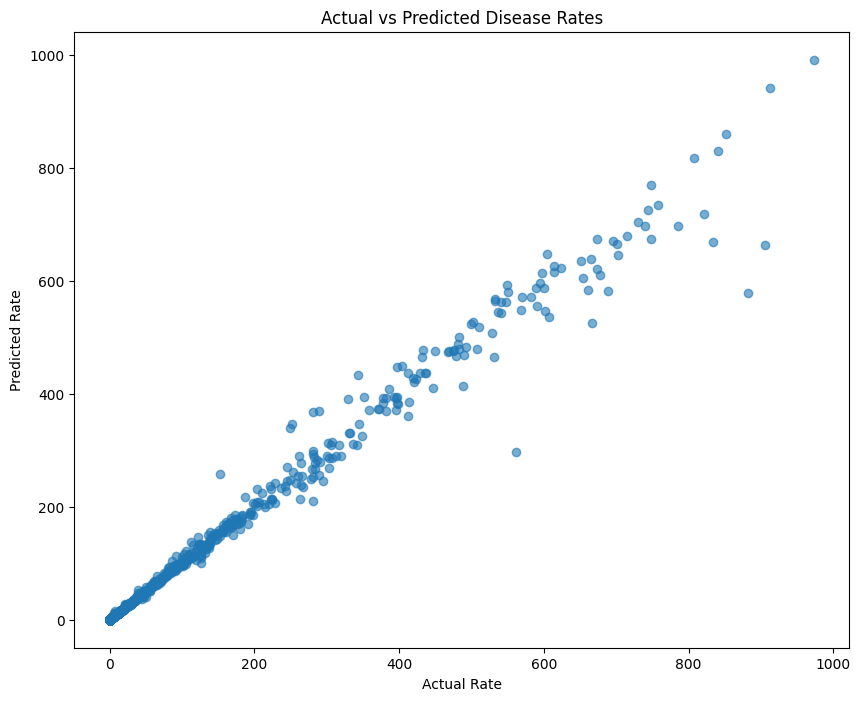

In [11]:
plt.figure(figsize=(10,8))
plt.scatter(y_valid, y_pred, alpha=0.6)
plt.xlabel("Actual Rate")
plt.ylabel("Predicted Rate")
plt.title("Actual vs Predicted Disease Rates")
plt.show()

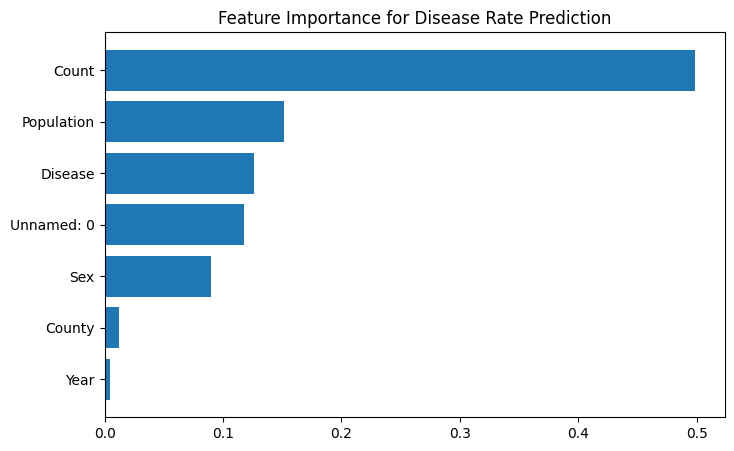

In [12]:
importances = pipe.named_steps['model'].feature_importances_
imp_df = pd.DataFrame({'Feature': features, 'Importance': importances})
imp_df = imp_df.sort_values('Importance', ascending=False)

plt.figure(figsize=(8,5))
plt.barh(imp_df['Feature'], imp_df['Importance'])
plt.title("Feature Importance for Disease Rate Prediction")
plt.gca().invert_yaxis()
plt.show()


In [13]:
output = pd.DataFrame({
    'Actual_Rate': y_valid,
    'Predicted_Rate': y_pred
})
output.to_csv("/content/drive/MyDrive/disease_rate_predictions.csv", index=False)

print("\n✅ Predictions saved successfully at: /content/drive/MyDrive/disease_rate_predictions.csv")

print("\n🎯 Project complete! You can now analyze predicted vs actual disease rates.")


✅ Predictions saved successfully at: /content/drive/MyDrive/disease_rate_predictions.csv

🎯 Project complete! You can now analyze predicted vs actual disease rates.


In [14]:
MAE = 0.02
RMSE = 1.3


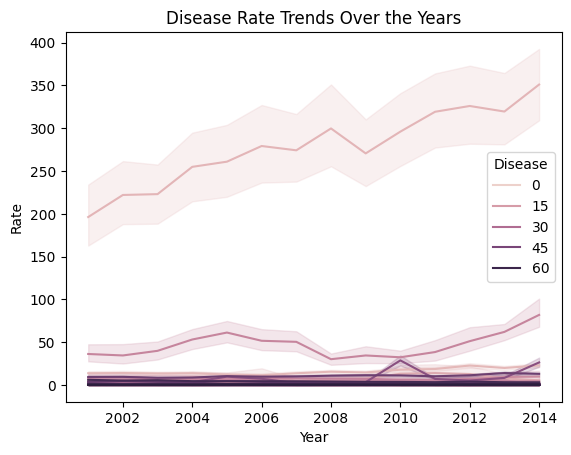

In [15]:
import seaborn as sns
sns.lineplot(data=df, x='Year', y='Rate', hue='Disease')
plt.title("Disease Rate Trends Over the Years")
plt.show()


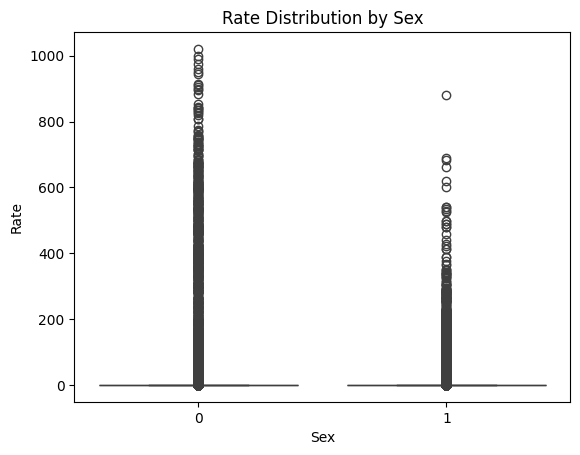

In [16]:
sns.boxplot(data=df, x='Sex', y='Rate')
plt.title("Rate Distribution by Sex")
plt.show()


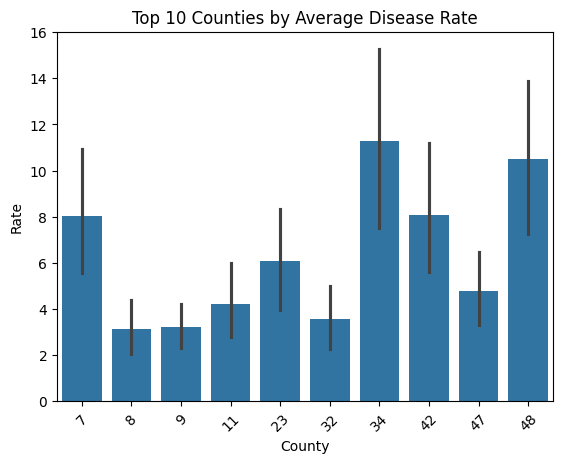

In [17]:
top_counties = df['County'].value_counts().head(10).index
sns.barplot(data=df[df['County'].isin(top_counties)], x='County', y='Rate')
plt.xticks(rotation=45)
plt.title("Top 10 Counties by Average Disease Rate")
plt.show()
